In [1]:
1# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../stock_exchange"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fundamentals.csv
prices.csv
prices-split-adjusted.csv
README.md
securities.csv
stock_prediction.ipynb



In [22]:
df=pd.read_csv('../stock_exchange/prices.csv')
print(df.tail(20))
df=df.loc[df['symbol'] == 'CSCO']
print(df.tail(8))

                       date symbol        open       close         low  \
851244           2016-12-30    WRK   51.840000   50.770000   50.529999   
851245           2016-12-30     WU   21.840000   21.719999   21.600000   
851246           2016-12-30     WY   30.450001   30.090000   29.950001   
851247           2016-12-30    WYN   76.849998   76.370003   76.180000   
851248           2016-12-30   WYNN   87.099998   86.510002   85.570000   
851249           2016-12-30    XEC  136.520004  135.899994  135.309998   
851250           2016-12-30    XEL   41.000000   40.700001   40.560001   
851251           2016-12-30     XL   37.360001   37.259998   37.060001   
851252           2016-12-30   XLNX   61.090000   60.369999   60.020000   
851253           2016-12-30    XOM   90.029999   90.260002   90.010002   
851254           2016-12-30   XRAY   58.290001   57.730000   57.540001   
851255           2016-12-30    XRX    8.720000    8.730000    8.700000   
851256           2016-12-30    XYL   4

In [3]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import math

/home/nishu/kerai/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

18
            date symbol       open      close        low       high  \
356   2010-01-04   CSCO  24.110001  24.690001  24.010000  24.840000   
824   2010-01-05   CSCO  24.600000  24.580000  24.379999  24.730000   
1292  2010-01-06   CSCO  24.540001  24.420000  24.340000  24.740000   
1760  2010-01-07   CSCO  24.299999  24.530001  24.170000  24.570000   
2228  2010-01-08   CSCO  24.379999  24.660000  24.250000  24.700001   

          volume      label  
356   59853700.0  22.469999  
824   45124500.0  22.730000  
1292  35715700.0  23.020000  
1760  31531200.0  23.070000  
2228  39115900.0  23.160000  


In [5]:
#X = np.array(df.drop(['label'], 1))

X=np.array(df.drop(['label','symbol','date'], axis=1))
#print(X)
X = preprocessing.scale(X)
#print(X)
X_lately = X[-forecast_out:]
#print(X_lately)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [6]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.8936355090692591


[29.08862329 29.75535116 29.76134277 29.7405606  29.83066432 30.27226707
 30.3458063  30.31031276 30.1056798  30.44315366 30.32134739 30.16087133
 30.14365937 30.23755764 30.37556232 30.24727211 30.18256153 30.01954925]
2016-12-05 00:00:00
1480914000.0
2016-12-06 00:00:00
                    date symbol  open  close  low  high  volume  label  \
2016-12-20 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-21 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-22 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-23 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-24 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                      Forecast  
2016-12-20 00:00:00  30.237558  
2016-12-21 00:00:00  30.375562  
2016-12-22 00:00:00  30.247272  
2016-12-23 00:00:00  30.182562  
2016-12-24 00:00:00  30.019549  


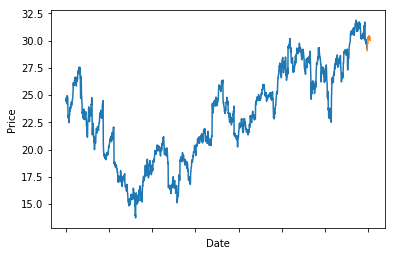

In [7]:
import time
forecast_set = clf.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
last_date=dt.strptime(last_date, '%Y-%m-%d')
#timestamp = time.mktime(time_123)
#a=repr(last_date)
dt_1 = dt1.datetime(last_date.year, last_date.month, last_date.day, 0, 0)
print (dt_1)
k = time.mktime(dt_1.timetuple())
print k

#time.mktime(dt.timetuple())
dt_2 = dt.fromtimestamp(86400)

one_day =time.mktime(dt_2.timetuple())
next_unix = dt.fromtimestamp(k + one_day) 
print next_unix
for i in forecast_set:
    next_u=time.mktime(next_unix.timetuple())
    #next_date = dt.fromtimestamp(next_u)
    next_u += 86400
    next_unix = dt.fromtimestamp(next_u)
    df.loc[next_unix] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())
df['close'].plot()
df['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [10]:
df=pd.read_csv('../stock_exchange/prices.csv')
yahoo = df[df['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

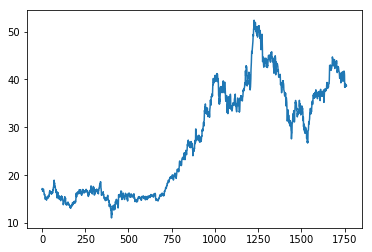

In [11]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [12]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

(1409, 353)


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`
  import sys


('compilation time : ', 0.015130996704101562)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [19]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/usr/local/lib/python2.7/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 19s 14ms/step - loss: 0.1376 - val_loss: 0.3193
Epoch 2/10
1336/1336 [==============================] - 0s 104us/step - loss: 0.0771 - val_loss: 0.1603
Epoch 3/10
1336/1336 [==============================] - 0s 120us/step - loss: 0.0435 - val_loss: 0.0745
Epoch 4/10
1336/1336 [==============================] - 0s 113us/step - loss: 0.0310 - val_loss: 0.0409
Epoch 5/10
1336/1336 [==============================] - 0s 103us/step - loss: 0.0216 - val_loss: 0.0230
Epoch 6/10
1336/1336 [==============================] - 0s 109us/step - loss: 0.0115 - val_loss: 0.0099
Epoch 7/10
1336/1336 [==============================] - 0s 113us/step - loss: 0.0051 - val_loss: 9.3312e-04
Epoch 8/10
1336/1336 [==============================] - 0s 112us/step - loss: 0.0023 - val_loss: 5.7391e-04
Epoch 9/10
1336/1336 [==============================] - 0s 121us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/1

[[0.6119696]]
[[1.4697174]]
[[3.478625]]
[[8.050863]]
[[14.181414]]
[[ 36.352104]
 [ 71.75993 ]
 [154.68764 ]
 [343.42963 ]
 [596.4987  ]]


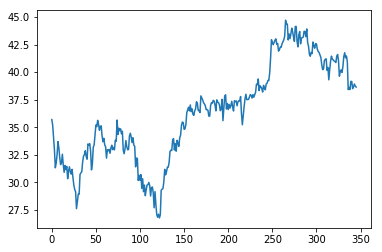

In [20]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

In [25]:
df=pd.read_csv('../stock_exchange/prices.csv')
XL = df[df['symbol']=='XL']
XL.shape

(1762, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [29]:
XL.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,28.231901,28.244739,27.992770,28.481158,2.996919e+06
std,6.892845,6.897018,6.895197,6.896134,1.852673e+06
min,16.040001,15.970000,15.590000,16.250000,3.891000e+05
25%,21.242500,21.252500,21.025000,21.490000,1.788225e+06
50%,30.355001,30.370001,30.155000,30.564999,2.510350e+06
75%,34.107500,34.167499,33.917499,34.380001,3.668125e+06
max,40.400002,40.410000,40.150002,40.480000,2.022710e+07


In [30]:
XL['changeduringday'] = ((df['high'] - df['low'] )/ df['low'])*100

XL['changefrompreviousday'] = (abs(XL['close'].shift() - XL['close'] )/ XL['close'])*100

/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
print("**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always")
XL.head()

**The new features 'changeduring day & change from previous day are added to the dataset. Note: The first row for change from previous day for each stock is NA or blank always


,date,symbol,open,close,low,high,volume,changeduringday,changefrompreviousday
708,2010-01-04,XL,18.520000,18.719999,18.450001,18.750000,2555900.0,1.626011,NaN
1176,2010-01-05,XL,18.639999,18.590000,18.450001,18.840000,3505000.0,2.113816,0.699295
1644,2010-01-06,XL,18.549999,18.400000,18.330000,18.660000,3423100.0,1.800327,1.032609
2112,2010-01-07,XL,18.330000,18.400000,18.180000,18.469999,5076400.0,1.595154,0.000000
2580,2010-01-08,XL,18.360001,18.200001,18.080000,18.370001,2865600.0,1.603988,1.098896


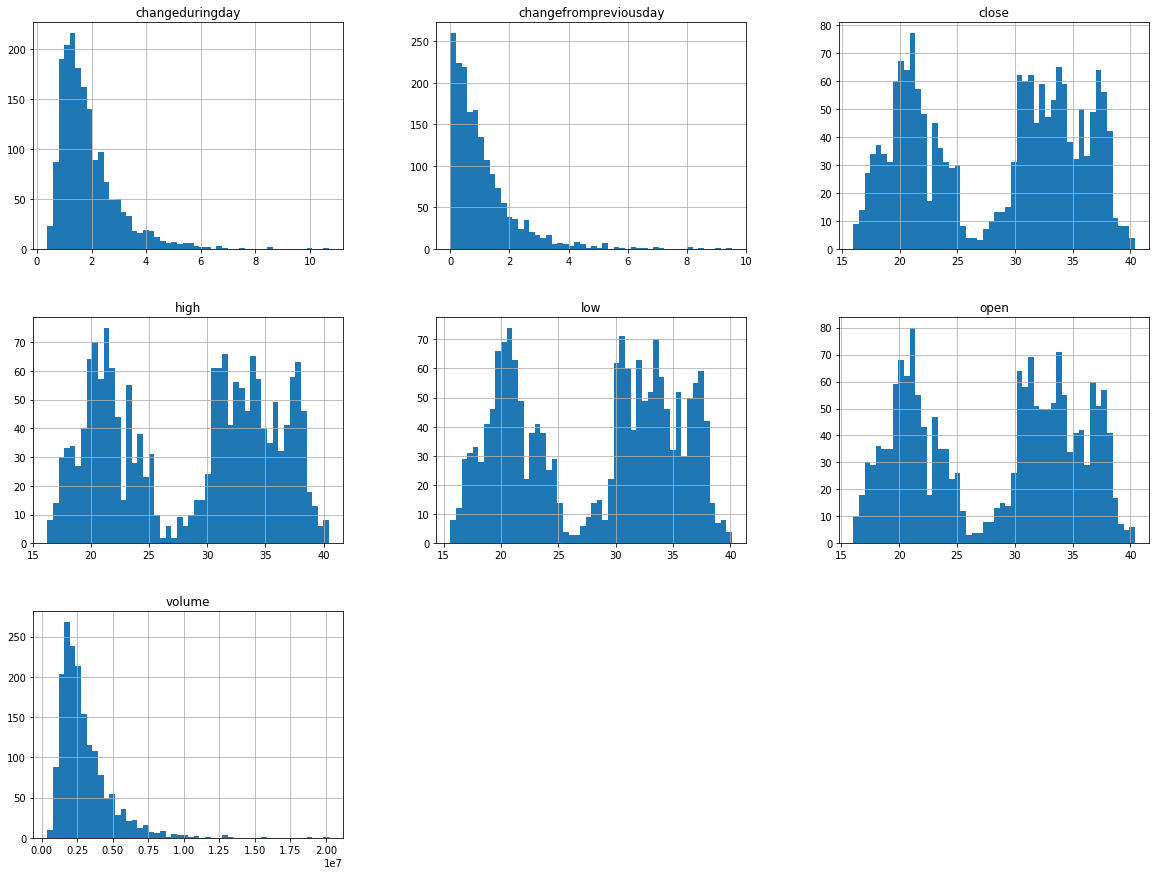

In [32]:
XL.hist(bins=50, figsize=(20,15))
plt.show()

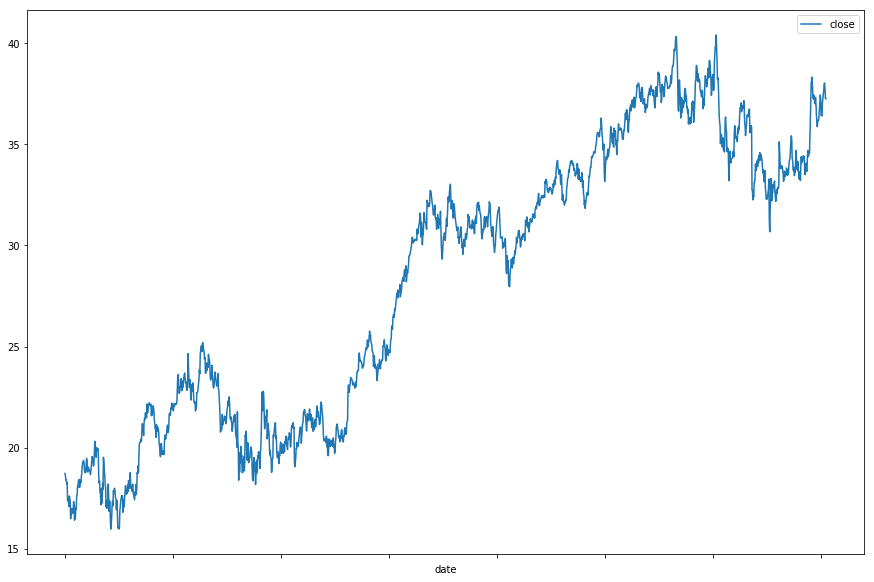

In [33]:
XL.plot(kind="line", x="date", y="close", figsize=(15, 10))

In [34]:
corr_matrix = XL.corr()

In [35]:
corr_matrix["close"].sort_values(ascending=False)

close                    1.000000
high                     0.999532
low                      0.999521
open                     0.998931
changefrompreviousday   -0.294165
volume                  -0.463833
changeduringday         -0.479275
Name: close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a217dbfd0>,
      dtype=object)

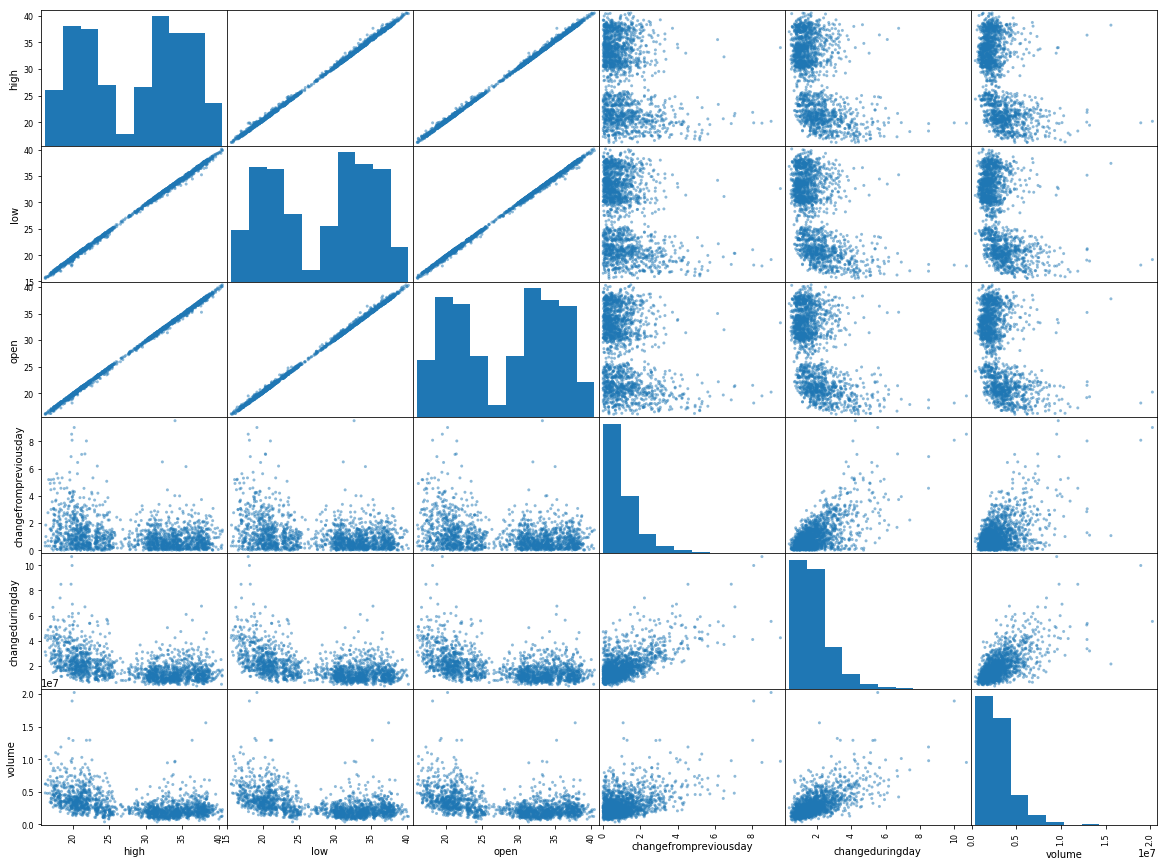

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]

scatter_matrix(XL[attributes], figsize=(20, 15))

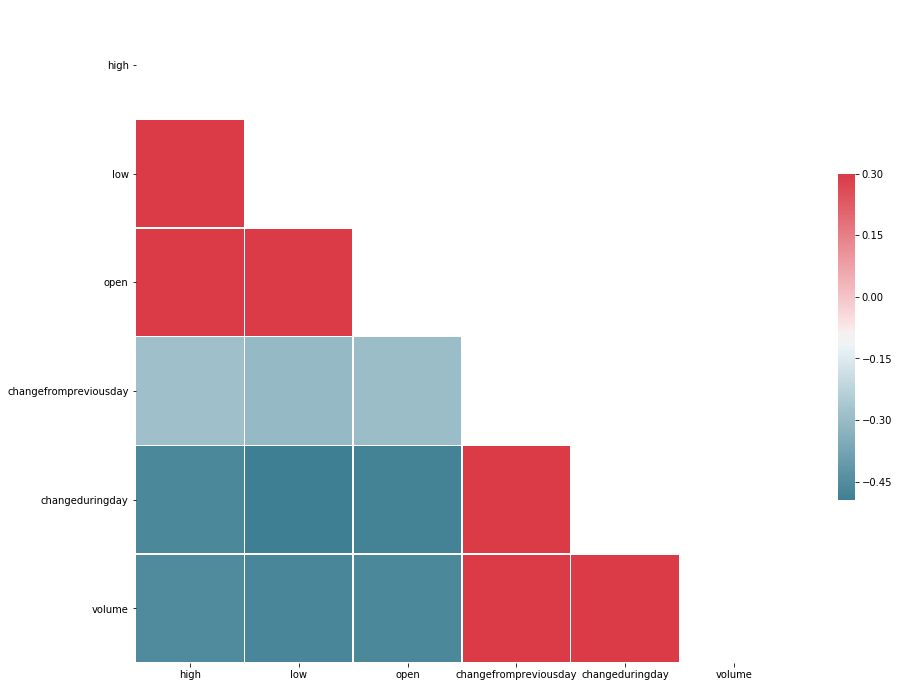

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
corr = XL[["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [44]:
#3. Regression model for stock representation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
X_stock_a = XL.drop(['date','symbol','close'], axis=1)
y_stock_a = XL['close']
X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2, random_state=42)

In [45]:
# Normalize the data and execute Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

In [54]:
#Normalize the data and execute RBF SVR¶
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [46]:
#Standardize the data and execute RBF SVR
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svrrbf_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svrrbf', SVR(kernel="rbf"))
        
    ])

svrrbf_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svrrbf', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [58]:
#Normalize the data and execute Linear Regression
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer

from sklearn.pipeline import Pipeline

Lr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [63]:
#Standardize the data and execute Linear SVR¶
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [64]:
#Normalize the data and execute Linear SVR
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

svr_pipeline_nor = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('normalizer',Normalizer()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_nor.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('normalizer', Normalizer(copy=True, norm='l2')), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [47]:
#Standardize the data and execute Linear Regression
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Data prep pipeline

Lr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('lr', LinearRegression())
        
    ])

Lr_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [52]:
#Standardize the data and execute Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

tree_reg = DecisionTreeRegressor(random_state=42)
dt_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('dt', DecisionTreeRegressor(random_state=42))
        
    ])

dt_pipeline_std.fit(X_stock_train, y_stock_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dt', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'))])

In [65]:
from sklearn.metrics import mean_absolute_error

#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mae_nor = mean_absolute_error(y_stock_test, lr_stock_predictions_nor)
print('Lr MAE with Normalization', lr_mae_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mae_std = mean_absolute_error(y_stock_test, lr_stock_predictions_std)
print('Lr MAE with standardization', lr_mae_std)

#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mae_nor = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_nor)
print('SVM RBF MAE with Normalization', svmrbf_mae_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mae_std = mean_absolute_error(y_stock_test, svmrbf_stock_predictions_std)
print('SVM RBF MAE with standardization', svmrbf_mae_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mae_nor = mean_absolute_error(y_stock_test, svm_stock_predictions_nor)
print('SVM MAE with Normalization', svm_mae_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mae_std = mean_absolute_error(y_stock_test, svm_stock_predictions_std)
print('SVM MAE with standardization', svm_mae_std)

#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mae_nor = mean_absolute_error(y_stock_test, dt_stock_predictions_nor)
print('DecisionTree MAE with Normalization', dt_mae_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mae_std = mean_absolute_error(y_stock_test, dt_stock_predictions_std)
print('DecisionTree MAE with standardization', dt_mae_std)

('Lr MAE with Normalization', 1.8634513814844234)
('Lr MAE with standardization', 0.11035324582319356)
('SVM RBF MAE with Normalization', 6.086487293824158)
('SVM RBF MAE with standardization', 0.2607904456856751)
('SVM MAE with Normalization', 6.086487210004912)
('SVM MAE with standardization', 0.11621873842224928)
('DecisionTree MAE with Normalization', 3.4245367603115606)
('DecisionTree MAE with standardization', 0.17209620679886659)


In [66]:
from sklearn.metrics import mean_absolute_error
#Linear Regression with normalisation and standardisation
#Linear Regression with normalisation and standardisation
lr_stock_predictions_nor = Lr_pipeline_nor.predict(X_stock_test)
lr_mse_nor = mean_squared_error(y_stock_test, lr_stock_predictions_nor)
lr_rmse_nor = np.sqrt(lr_mse_nor)
print('Lr RMSE with Normalization', lr_rmse_nor)

lr_stock_predictions_std = Lr_pipeline_std.predict(X_stock_test)
lr_mse_std = mean_squared_error(y_stock_test, lr_stock_predictions_std)
lr_rmse_std = np.sqrt(lr_mse_std)
print('Lr RMSE with standardization', lr_rmse_std)

#SVM with RFB Kernel with normalisation and standardisation
svmrbf_stock_predictions_nor = svrrbf_pipeline_nor.predict(X_stock_test)
svmrbf_mse_nor = mean_squared_error(y_stock_test, svmrbf_stock_predictions_nor)
svmrbf_rmse_nor = np.sqrt(svmrbf_mse_nor)
print('SVM RBF RMSE with Normalization', svmrbf_rmse_nor)


svmrbf_stock_predictions_std = svrrbf_pipeline_std.predict(X_stock_test)
svmrbf_mse_std = mean_squared_error(y_stock_test, svmrbf_stock_predictions_std)
svmrbf_rmse_std = np.sqrt(svmrbf_mse_std)
print('SVM RBF RMSE with standardization', svmrbf_rmse_std)

#SVM with normalisation and standardisation
svm_stock_predictions_nor = svr_pipeline_nor.predict(X_stock_test)
svm_mse_nor = mean_squared_error(y_stock_test, svm_stock_predictions_nor)
svm_rmse_nor = np.sqrt(svm_mse_nor)
print('SVM RMSE with Normalization', svm_rmse_nor)

svm_stock_predictions_std = svr_pipeline_std.predict(X_stock_test)
svm_mse_std = mean_squared_error(y_stock_test, svm_stock_predictions_std)
svm_rmse_std = np.sqrt(svm_mse_std)
print('SVM RMSE with standardization', svm_rmse_std)

from sklearn.metrics import mean_squared_error
#Decision Tree with normalisation and standardisation
dt_stock_predictions_nor = dt_pipeline_nor.predict(X_stock_test)
dt_mse_nor = mean_squared_error(y_stock_test, dt_stock_predictions_nor)
dt_rmse_nor = np.sqrt(dt_mse_nor)
print('DecisionTree RMSE with Normalization', dt_rmse_nor)

dt_stock_predictions_std = dt_pipeline_std.predict(X_stock_test)
dt_mse_std = mean_squared_error(y_stock_test, dt_stock_predictions_std)
dt_rmse_std = np.sqrt(dt_mse_std)
print('DecisionTree RMSE with standardization', dt_rmse_std)




('Lr RMSE with Normalization', 2.476936233279238)
('Lr RMSE with standardization', 0.139940654943025)
('SVM RBF RMSE with Normalization', 7.067521840089051)
('SVM RBF RMSE with standardization', 0.6553363435560411)
('SVM RMSE with Normalization', 7.067521750544053)
('SVM RMSE with standardization', 0.14667875096421182)
('DecisionTree RMSE with Normalization', 4.633044368424532)
('DecisionTree RMSE with standardization', 0.23498831048401755)


In [67]:
lr_std = ['1',"Linear Regression with standardisation",np.round(lr_rmse_std,3),np.round(lr_mae_std,3)]
lr_nor = ['2',"Linear Regression with normalisation",np.round(lr_rmse_nor,3),np.round(lr_mae_nor,3)]
dt_std = ['3',"Decision Tree with standardisation",np.round(dt_rmse_std,3),np.round(dt_mae_std,3)]
dt_nor = ['4',"Decision Tree with normalisation",np.round(dt_rmse_nor,3),np.round(dt_mae_nor,3)]

svm_std = ['5',"SVM with standardisation",np.round(svm_rmse_std,3),np.round(svm_mae_std,3)]
svm_nor = ['6',"SVM with normalisation",np.round(svm_rmse_nor,3),np.round(svm_mae_nor,3)]

svmrfb_std = ['7',"SVM RFB with standardisation",np.round(svmrbf_rmse_std,3),np.round(svmrbf_mae_std,3)]
svmrfb_nor = ['8',"SVM RFB with normalisation",np.round(svmrbf_rmse_nor,3),np.round(svmrbf_mae_nor,3)]
#ridge_std = ['9',"Ridge Regression with standardisation",np.round(ridge_rmse_std,3),np.round(ridge_mae_std,3)]
#lasso_std = ['10',"Lasso Regression with standardisation",np.round(lasso_rmse_std,3),np.round(lasso_mae_std,3)]



In [68]:
#,ridge_std,lasso_std
linear_model_result= pd.DataFrame([lr_std,lr_nor,dt_std,dt_nor,svm_std,svm_nor,svmrfb_std,svmrfb_nor],columns=[ "ExpID", "Model", "RMSE","MAE"])

linear_model_result

,ExpID,Model,RMSE,MAE
0,1,Linear Regression with standardisation,0.140,0.110
1,2,Linear Regression with normalisation,2.477,1.863
2,3,Decision Tree with standardisation,0.235,0.172
3,4,Decision Tree with normalisation,4.633,3.425
4,5,SVM with standardisation,0.147,0.116
5,6,SVM with normalisation,7.068,6.086
6,7,SVM RFB with standardisation,0.655,0.261
7,8,SVM RFB with normalisation,7.068,6.086
